In [1]:
### Spark Tutorial

In [2]:
## Task 1: Install Pyspark !!
# !pip install pyspark

In [3]:
# Necessary 

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import count, desc, col, max, struct
import matplotlib.pyplot as plt


In [5]:
## Creating sparksession 
spark =  SparkSession.builder.appName('spark_app').getOrCreate()

## Task 2: 
### Importing the Listning.csv file !

In [6]:
listning_csv_path = 'listenings.csv'

# We use spark method called read which read csv format data. 
# 'inferSchema' = True, =>, infers columns types based on the data type we have
# 'header' = Ture => same column name as in csv file. 
listning_df = spark.read.format('csv')\
                        .option('inferSchema', True)\
                        .option('header', True)\
                        .load(listning_csv_path)

# listning_df is a pyspark dataframe. 

In [7]:
# checking what is inside listning_df using show method
listning_df.show(10)

+-----------+-------------+--------------------+------------+--------------------+
|    user_id|         date|               track|      artist|               album|
+-----------+-------------+--------------------+------------+--------------------+
|000Silenced|1299680100000|           Price Tag|    Jessie J|         Who You Are|
|000Silenced|1299679920000|Price Tag (Acoust...|    Jessie J|           Price Tag|
|000Silenced|1299679440000|Be Mine! (Ballad ...|       Robyn|            Be Mine!|
|000Silenced|1299679200000|            Acapella|       Kelis|            Acapella|
|000Silenced|1299675660000|   I'm Not Invisible|   The Tease|   I'm Not Invisible|
|000Silenced|1297511400000|Bounce (Feat NORE...|    MSTRKRFT|         Fist of God|
|000Silenced|1294498440000|Don't Stop The Mu...|     Rihanna|Addicted 2 Bassli...|
|000Silenced|1292438340000|               ObZen|   Meshuggah|               ObZen|
|000Silenced|1292437740000|   Yama's Messengers|      Gojira|The Way of All Flesh|
|000

In [10]:
# dropping useless columns
listning_df = listning_df.drop('date')
# dropping the null rows
listning_df = listning_df.na.drop()
# checking the dataset again
listning_df.show(5) 

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



In [11]:
# let's see the schema using method called printSchema
listning_df.printSchema()

root
 |-- user_id: string (nullable = true)
 |-- track: string (nullable = true)
 |-- artist: string (nullable = true)
 |-- album: string (nullable = true)



In [12]:
# let's see the shape of our dataframe!
# check number of rows and columns in the dataset
shape = (listning_df.count(), len(listning_df.columns))
print(shape)
# Pyspark dataframe doesnot have shape property like pandas dataframe

(13758905, 4)


In [13]:
## Apply some query to extract useful information !!

# Query 0: Select 2 columns, track and artist
# returns dataframe which is stored in Q0 variable
q0 = listning_df.select('artist', 'track') 
q0.show(5)

+---------+--------------------+
|   artist|               track|
+---------+--------------------+
| Jessie J|           Price Tag|
| Jessie J|Price Tag (Acoust...|
|    Robyn|Be Mine! (Ballad ...|
|    Kelis|            Acapella|
|The Tease|   I'm Not Invisible|
+---------+--------------------+
only showing top 5 rows



In [14]:
#Query 1: Let's find all the records of users who have listened to Rihanna
q1 = listning_df.select('*').filter(listning_df.artist == 'Rihanna')
q1.show(10)

+-----------+--------------------+-------+--------------------+
|    user_id|               track| artist|               album|
+-----------+--------------------+-------+--------------------+
|000Silenced|Don't Stop The Mu...|Rihanna|Addicted 2 Bassli...|
|000Silenced|           Disturbia|Rihanna|Good Girl Gone Ba...|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|   Hatin On The Club|Rihanna|              Random|
|00williamsl|         Complicated|Rihanna|                Loud|
|00williamsl|What's My Name (f...|Rihanna|                Loud|
|00williamsl|Kanye West feat R...|Rihanna|                Loud|
|    0502008|Only Girl (In the...|Rihanna|                Loud|
|      0rdos|Pon De Replay (Re...|Rihanna|    Music of the Sun|
|      0rdos|          Now I Know|Rihanna|    Music of the Sun|
+-----------+--------------------+-------+--------------------+
only showing top 10 rows



In [15]:
# Query 2: Find top 10 users who is fan of Rihanna !

# Step 1:
#  Select all the users who have listened to Rihanna

# Step 2:
# Perform agregation to count how many time each users have listened to rihanna

q2 = listning_df.select('user_id')\
                .filter(listning_df.artist == 'Rihanna')\
                .groupby('user_id')\
                .agg(count('user_id').alias('count'))\
                .orderBy(desc('count'))\
                .limit(10)

# agg -> aggregation, .alias('count') -> we are giving new column name, count !
# orderBy is used for sorting either in ascending or descending order 
# as we need top 10 fans, we will use limit method for finding top 10 columns

q2.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        thiessu|  179|
|    eyessetkyle|  166|
|           adxx|  164|
|missnumberthree|  156|
|helloiamnatalie|  128|
|          nmjnb|  124|
|        AndyyyA|  123|
|     BIGBANG186|  121|
|     mixedvibes|  120|
|       AndyKitt|  115|
+---------------+-----+



In [16]:
# Query 3: Find top 10 famours track!

# Note: There can by 2 same track name of 2 different artists
# So select artist and track and use groupby on both, rather than just track
# if more than one column, in count use '*' instead of both names!
q3 = listning_df.select('artist','track')\
                .groupby('artist', 'track')\
                .agg(count('*').alias('count'))\
                .orderBy(desc('count'))\
                .limit(10)
q3.show()

+--------------+-----------------+-----+
|        artist|            track|count|
+--------------+-----------------+-----+
| Justin Bieber|            Sorry| 3381|
|Arctic Monkeys| Do I Wanna Know?| 2865|
|      Bon Iver|      Skinny Love| 2836|
|          Zayn|       PILLOWTALK| 2701|
|   The Killers|    Mr Brightside| 2690|
|       Rihanna|             Work| 2646|
|      Bastille|          Pompeii| 2606|
|Mumford & Sons|  Little Lion Man| 2520|
|Mumford & Sons|         The Cave| 2485|
| Justin Bieber|What Do You Mean?| 2481|
+--------------+-----------------+-----+



In [17]:
# Query 4, Famous top 10 tracks of Rihanna !!

q4 = listning_df.filter(listning_df.artist == 'Rihanna')\
                .select('artist', 'track')\
                .groupby('artist', 'track')\
                .agg(count('*').alias('count'))\
                .orderBy(desc('count'))\
                .limit(10)
q4.show()

+-------+--------------------+-----+
| artist|               track|count|
+-------+--------------------+-----+
|Rihanna|                Work| 2646|
|Rihanna|Only Girl (In the...| 1749|
|Rihanna|We Found Love (fe...| 1575|
|Rihanna|                 S&M| 1307|
|Rihanna|            Rude Boy| 1303|
|Rihanna|            Diamonds| 1224|
|Rihanna|      Kiss it Better|  945|
|Rihanna| Where Have You Been|  844|
|Rihanna|Cheers (Drink to ...|  697|
|Rihanna|           Needed Me|  679|
+-------+--------------------+-----+



In [18]:
listning_df.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



In [19]:
# Query 5, Find top 10 famous album !
# groupby is done by both artist and album as there may be same album
# by different artist
q5 = listning_df.select('artist', 'album')\
                .groupby('artist', 'album')\
                .agg(count('*').alias('count'))\
                .orderBy(desc('count'))\
                .limit(10)
q5.show()

+--------------------+--------------------+-----+
|              artist|               album|count|
+--------------------+--------------------+-----+
|          Kanye West|   The Life Of Pablo|22310|
|              The xx|                  xx|14195|
|      Arctic Monkeys|                  AM|14090|
|               alt-J|     An Awesome Wave|13635|
|      Mumford & Sons|        Sigh No More|13543|
|      Arctic Monkeys|Whatever People S...|12731|
|            Bon Iver|            For Emma|11994|
|              Grimes|          Art Angels|11655|
|Florence + the Ma...|               Lungs|11362|
|               Adele|                  21|11215|
+--------------------+--------------------+-----+



In [21]:
# Task 4: Importing Genre csv file !!
genre_csv_path = 'genre.csv'
genre_df = spark.read.format('csv')\
                      .option('inferSchema', True)\
                      .option('header', True)\
                      .load(genre_csv_path)

In [22]:
genre_df.show(5)

+----------+-----+
|    artist|genre|
+----------+-----+
|      Muse| rock|
|   Nirvana| rock|
|  Bon Jovi| rock|
|The Police| rock|
|      Kiss| rock|
+----------+-----+
only showing top 5 rows



In [23]:
listning_df.show(5)

+-----------+--------------------+---------+-----------------+
|    user_id|               track|   artist|            album|
+-----------+--------------------+---------+-----------------+
|000Silenced|           Price Tag| Jessie J|      Who You Are|
|000Silenced|Price Tag (Acoust...| Jessie J|        Price Tag|
|000Silenced|Be Mine! (Ballad ...|    Robyn|         Be Mine!|
|000Silenced|            Acapella|    Kelis|         Acapella|
|000Silenced|   I'm Not Invisible|The Tease|I'm Not Invisible|
+-----------+--------------------+---------+-----------------+
only showing top 5 rows



In [24]:
# Let's inner join the two dataframe !
# We will use .join method to merge both dataframe

data = listning_df.join(genre_df, how = 'inner', on = ['artist'])
data.show()

+------------+-----------+--------------------+--------------------+--------------------+
|      artist|    user_id|               track|               album|               genre|
+------------+-----------+--------------------+--------------------+--------------------+
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Ariana Grande & ...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|           Price Tag|         Who You Are| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|           Price Tag|         Who You Are|                 pop|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Ariana Grande & ...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Jhene Aiko & Rixton|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag| Nicki Minaj & Ar...|
|    Jessie J|000Silenced|Price Tag (Acoust...|           Price Tag|                 pop|
|       Ro

In [25]:
# Query 6: Find top 10 users who are fan of pop music

q6 = data.filter(data.genre == 'pop')\
         .select('user_id')\
         .groupby('user_id')\
         .agg(count('*').alias('count'))\
         .orderBy(desc('count'))\
         .limit(10)

q6.show()

+---------------+-----+
|        user_id|count|
+---------------+-----+
|        01Green|  496|
|      momousagi|  400|
|          mrpsb|  400|
|   BlueKnockOut|  378|
|    musicboy80s|  376|
|  incultojurgis|  374|
| ElektricOrchid|  370|
|foreign_fanatic|  350|
|   Kevin_Soutar|  346|
|  landrover2171|  301|
+---------------+-----+



In [26]:
# Query 7: Find top 10 famous genre !!
q7 = data.select('genre')\
         .groupby('genre')\
         .agg(count('*').alias('count'))\
         .orderBy(desc('count'))\
         .limit(10)

q7.show()

+----------+-------+
|     genre|  count|
+----------+-------+
|      rock|2691934|
|       pop|1544747|
|electronic| 551509|
|   hip hop| 532984|
|      folk| 438174|
|indie rock| 431439|
|      punk| 380915|
|       r&b| 344101|
|     metal| 208107|
|     indie| 206726|
+----------+-------+



## Task 5

In [27]:
# Query 8: Find out each user's favourite genre !

# Step 1 - How many times each users have listened to specific genre 
q8_1 = data.select('user_id', 'genre')\
           .groupby('user_id', 'genre')\
           .agg(count('*').alias('count'))\
           .orderBy('user_id')
q8_1.show(5)

+-------+--------------------+-----+
|user_id|               genre|count|
+-------+--------------------+-----+
| --Seph|                soul|    1|
| --Seph|          Thom Yorke|    2|
| --Seph|           classical|   31|
| --Seph|     Jennifer Vyvyan|    1|
| --Seph| Tamás Vásáry & Y...|    1|
+-------+--------------------+-----+
only showing top 5 rows



In [28]:
# Step 2 - Genre he/she have listened to a maximum number of times !                    
q8_2 = q8_1.groupby('user_id')\
           .agg(max(struct(col('count'), col('genre'))).alias('max'))\
           .select(col('user_id'), col('max.genre'))
q8_2.show(5)

+-------------+-----------+
|      user_id|      genre|
+-------------+-----------+
|      -Gemma-|british pop|
|      247flix|   synthpop|
|   A3sahaettr|      metal|
|      AYFBlog| indie rock|
|AdamMcSpaddam|       rock|
+-------------+-----------+
only showing top 5 rows



In [29]:
# Query 9: Find out how many rock, pop, metal and hiphop singer we have !
q9 = genre_df.select('genre')\
             .filter((col('genre') == 'pop') | (col('genre') == 'rock') | (col('genre') == 'metal') | (col('genre') == 'hip hop'))\
             .groupby('genre')\
             .agg(count('genre').alias('count'))
q9.show(5)

+-------+-----+
|  genre|count|
+-------+-----+
|    pop| 6960|
|hip hop| 4288|
|  metal| 1854|
|   rock| 9066|
+-------+-----+



In [30]:
# Now let's visualize using matplotlib !
# .collect() method returns list object of data. 
q9.collect()

[Row(genre='pop', count=6960),
 Row(genre='hip hop', count=4288),
 Row(genre='metal', count=1854),
 Row(genre='rock', count=9066)]

In [31]:
# Storing the list in q9_list
q9_list = q9.collect()

labels = [row['genre'] for row in q9_list]
counts = [row['count'] for row in q9_list]

<BarContainer object of 4 artists>

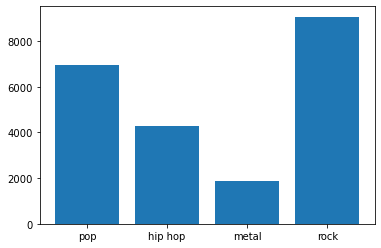

In [32]:
# Now Bar chart 
plt.bar(labels, counts)